<a href="https://colab.research.google.com/github/akashlogics/AI-ML-Vehicle-Routing-Problem/blob/main/AI_ML_Vehicle_Routing_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 2.6 MB/s eta 0:00:00


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

Number of locations: 10
Locations: [(53, 51), (61, 75), (58, 34), (22, 45), (84, 11), (67, 55), (21, 93), (66, 62), (61, 98), (4, 25)]
Depot: (50, 50)
Number of vehicles: 3


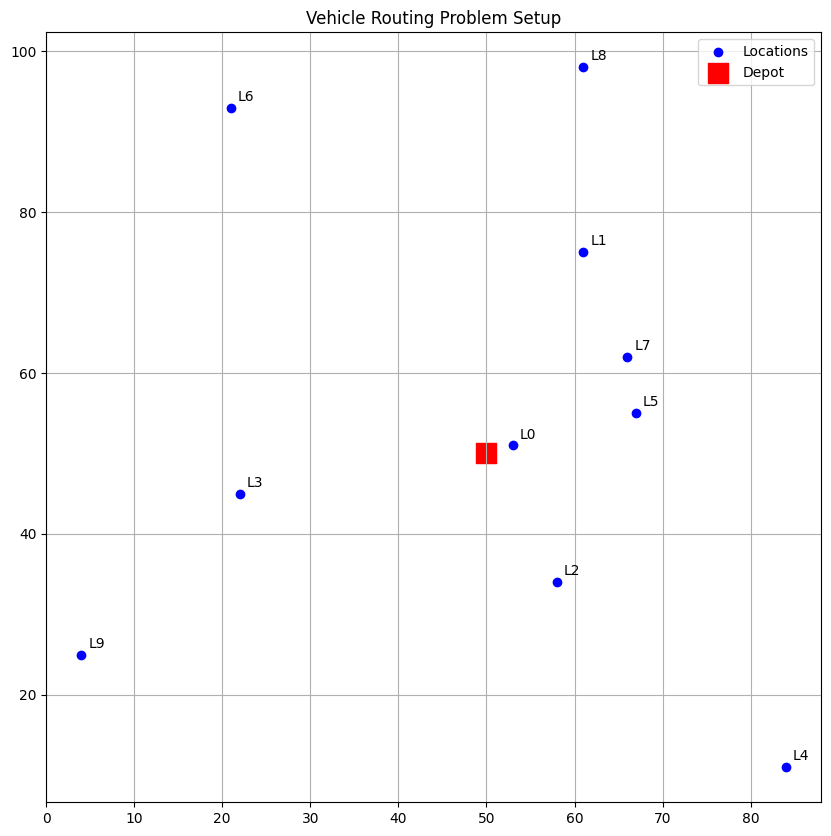

In [ ]:
# Define the number of locations (eg 10)
num_locations = 10
# Create a list of tuples representing location coordinates -
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]
            # try to use a random number generator
            # (x, y) could be between 0 and 100

depot =(50, 50) # Define the coordinates for the depot

num_vehicles = 3# Define the number of vehicles - (eg 3)

# Display the problem setup
print(f"Number of locations: {num_locations}")
print(f"Locations: {locations}")
print(f"Depot: {depot}")
print(f"Number of vehicles: {num_vehicles}")

# Visualize the problem
plt.figure(figsize=(10, 10))
x, y = zip(*locations)
plt.scatter(x, y, c='blue', label='Locations')
plt.scatter(depot[0], depot[1], c='red', s=200, marker='s', label='Depot')
for i, loc in enumerate(locations):
    plt.annotate(f"L{i}", (loc[0], loc[1]), xytext=(5, 5), textcoords='offset points')
plt.title("Vehicle Routing Problem Setup")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Define the fitness class (we want to minimize total distance)
creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0))

# Define the Individual class
# An individual will be a list of integers representing the order of visits
creator.create("Individual", list, fitness=creator.FitnessMin)

In [ ]:
toolbox = base.Toolbox()

# Register the indices function to create a random permutation of locations
toolbox.register("indices", random.sample, range(num_locations), num_locations)

# Register the individual creation operation
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)

# Register the population creation operation
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


In [ ]:
#Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))

        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)

In [ ]:
toolbox.register("evaluate", evalVRP)

In [ ]:
toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection

In [ ]:
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

gen	nevals	avg    	min    
0  	300   	289.545	3.92188
1  	220   	280.803	2.43537
2  	240   	276.753	2.41187
3  	229   	272.076	2.41187
4  	228   	269.228	2.41187
5  	218   	268.561	2.41187
6  	220   	267.535	2.4384 
7  	232   	264.015	2.16754
8  	223   	262.894	2.16754
9  	219   	259.852	2.16754
10 	251   	262.997	4.19071
11 	221   	262.666	5.62359
12 	221   	253.484	3.8443 
13 	212   	247.714	4.19071
14 	216   	234.067	4.19071
15 	222   	215.851	2.98009
16 	229   	204.384	4.66181
17 	230   	203.379	12.4371
18 	228   	202.526	4.66181
19 	244   	200.872	4.66181
20 	223   	200.375	12.7368
21 	222   	203.141	4.66181
22 	223   	202.165	12.1105
23 	218   	201.23 	2.29725
24 	240   	200.94 	4.57212
25 	227   	201.403	3.22757
26 	235   	200.316	4.57212
27 	235   	202.376	13.3437
28 	235   	201.56 	2.29725
29 	240   	203.015	15.7947
30 	235   	200.87 	13.3987
31 	232   	200.907	4.57212
32 	229   	201.32 	2.29725
33 	243   	202.348	13.3987
34 	214   	201.831	13.9488
35 	234   	204.126	13.3987
3

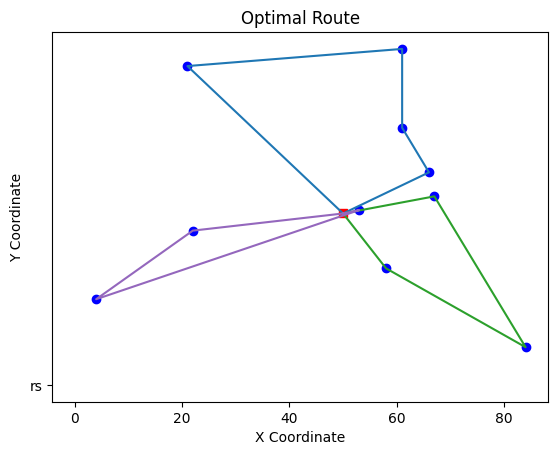

In [ ]:
# Running the Genetic Algorithm
# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()